In [21]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import math
sys.path.append('/sternadi/home/volume2/noam/SternLab')
from blast_utilities import blast_to_df
import scipy.stats
from freqs_utilities import compatibilty_old_to_new
import glob

In [35]:
#b = blast_to_df('/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-z/tmp/2813_sample_sample_2h-z_contig_list_trimmed.part1.fasta.blast')
#b = blast_to_df('/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-u/tmp/2813_sample_sample_2h-u_contig_list_trimmed.part1.fasta.blast')
b = blast_to_df('/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_15/tmp/2813_sample_sample_15_contig_list_trimmed.part1.fasta.blast')



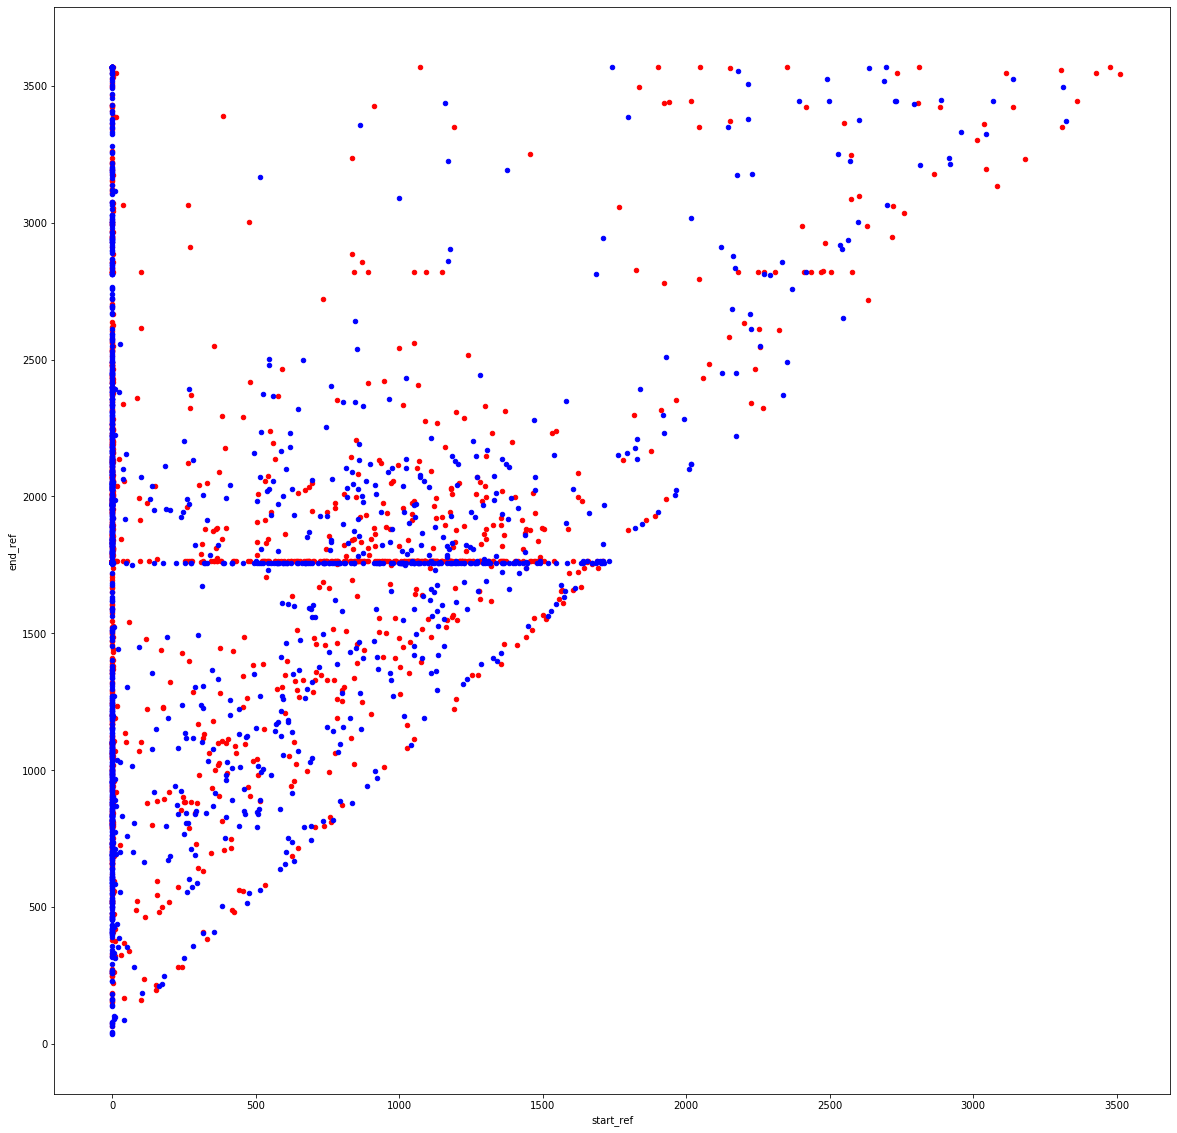

In [36]:
fig, ax = plt.subplots()
b[b.strand == 'plus'].plot(x='start_ref', y='end_ref', kind='scatter', ax=ax, color='red')
b[b.strand == 'minus'].plot(x='start_ref', y='end_ref', kind='scatter', ax=ax, color='blue')

fig.set_size_inches(20,20)

In [28]:
b.groupby('read').start_ref.count().reset_index().groupby('start_ref').count()

,read
start_ref,
1,8053
2,217
3,1


In [20]:
b.groupby('end_ref').read.count().sort_values()

end_ref
41         1
1749       1
2917       1
2910       1
2909       1
1759       1
1761       1
2904       1
2901       1
2898       1
1769       1
2896       1
1772       1
2893       1
2892       1
1778       1
1781       1
1784       1
1786       1
1790       1
2883       1
2882       1
1795       1
1796       1
1797       1
1799       1
2879       1
1803       1
1747       1
2918       1
        ... 
3010      11
3374      11
3553      12
3441      12
3013      12
3559      13
2697      13
3435      13
3446      14
3383      15
1756      16
3563      17
3444      17
3445      17
3552      17
3422      21
3439      23
3562      26
3447      26
3557      31
3548      31
3561      37
1757      65
3567      72
3564      85
3566      85
1764     128
3565     130
3569    1525
3568    2395
Name: read, Length: 1866, dtype: int64

In [37]:
blast_paths = glob.glob('/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_*/tmp/*.blast')
for i in blast_paths:
    b = blast_to_df(i)
    print('\n' + i.split('/')[-3])
    #print(b.groupby('read').start_ref.count().reset_index().groupby('start_ref').count())
    mapped_once = b[b.groupby('read').end_ref.transform('count') == 1]
    print(f'percent of reads end in 1764: {100 * len(mapped_once[mapped_once.end_ref == 1764]) / len(mapped_once)}')
    



2813_sample_sample_0-z
percent of reads end in 1764: 0.7667031763417306

2813_sample_sample_15
percent of reads end in 1764: 14.0795631825273

2813_sample_sample_2h-u
percent of reads end in 1764: 1.1300136595057741

2813_sample_sample_2h-z
percent of reads end in 1764: 0.5361930294906166

2813_sample_sample_30
percent of reads end in 1764: 14.079311404857055

2813_sample_sample_on-u
percent of reads end in 1764: 0.47849274784429047

2813_sample_sample_on-z
percent of reads end in 1764: 0.29411764705882354

2813_sample_sample_o-u
percent of reads end in 1764: 0.30034777110338284


In [34]:
blast_paths

['/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_0-z/tmp/2813_sample_sample_0-z_contig_list_trimmed.part1.fasta.blast',
 '/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_15/tmp/2813_sample_sample_15_contig_list_trimmed.part1.fasta.blast',
 '/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-u/tmp/2813_sample_sample_2h-u_contig_list_trimmed.part1.fasta.blast',
 '/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_2h-z/tmp/2813_sample_sample_2h-z_contig_list_trimmed.part1.fasta.blast',
 '/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_30/tmp/2813_sample_sample_30_contig_list_trimmed.part1.fasta.blast',
 '/sternadi/nobackup/volume1/noam/ms2_data/loop_genomics_202012/perl_pipeline/2813_sample_sample_on-u/tmp/2813_sample_sample_on-u_contig_list_trimmed.part1.fast